In [0]:
import pandas as pd
import numpy as np

In [0]:
train=pd.read_csv('sample_data/train.csv')
test=pd.read_csv('sample_data/test.csv')

In [75]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [76]:

test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [78]:

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [79]:

train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,...,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,...,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.093858,0.080674,0.714555,0.285445,34.303547,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,1.188852,0.692460,0.933052,1.206172,1.047559,1.440995,1.771202,1.772216,1.876428,4.730877,0.946550,1.772216,0.491107,0.267782,0.390756,0.092235,0.319788,0.113621,0.038248,0.038248,0.461361,0.416196,0.030675,0.032332,0.127120,0.248156,0.170391,0.131805,0.055942,0.046827,...,4.167694,0.341384,0.376140,0.405683,0.388653,0.316233,0.132568,0.123892,0.346790,0.123071,0.944507,0.819946,0.48578,0.300754,0.385573,0.129485,0.274750,0.302827,0.451251,0.155199,1.483249,0.492286,0.290036,0.241826,0.275543,0.291646,0.272348,0.451650,0.451650,21.612261,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000

In [80]:
test.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,...,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,4203.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,...,23856.000000,23825.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,1.980508,0.389168,1.656522,2.045691,0.805709,3.220490,4.026199,4.021756,4.140426,7.214914,0.425172,4.021756,0.588741,0.077171,0.201375,0.008300,0.107017,0.014462,0.001677,0.001258,0.692740,0.234029,0.001761,0.000126,0.013456,0.057889,0.971538,0.018989,0.002138,0.001425,...,4.021756,9.157474,0.130449,0.174128,0.208166,0.184775,0.112844,0.017815,0.013875,0.143863,0.013875,2.747108,1.642226,0.625964,0.106346,0.164152,0.018192,0.085345,0.114059,0.289361,0.977825,2.840921,0.580651,0.082746,0.073105,0.086519,0.099640,0.077339,0.721663,0.278337,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,0.990171,1.171626,0.677171,0.898531,1.170700,1.068370,1.349542,1.714507,1.714350,1.877819,4.732408,1.767765,1.714350,0.492072,0.266869,0.401036,0.090726,0.309141,0.119387,0.040914,0.035440,0.461368,0.423399,0.041923,0.011214,0.115218,0.233538,0.166293,0.136489,0.046188,0.037726,...,1.714350,4.080513,0.336804,0.379228,0.406004,0.388123,0.316408,0.132282,0.116974,0.350958,0.116974,0.969614,0.931602,0.483883,0.308287,0.370421,0.133650,0.279401,0.317890,0.453475,0.147255,1.444383,0.493463,0.275504,0.260315,0.281135,0.299525,0.267134,0.448189,0.448189,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,8

In [81]:
train.shape

(9557, 143)

In [82]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
rez_esc,7928,0.829549
v18q1,7342,0.768233
v2a1,6860,0.717798
meaneduc,5,0.000523
SQBmeaned,5,0.000523
techozinc,0,0.000000
techoentrepiso,0,0.000000
techocane,0,0.000000
techootro,0,0.000000
cielorazo,0,0.000000


In [83]:
train['rez_esc']

0       NaN
1       NaN
2       NaN
3       1.0
4       NaN
       ... 
9552    NaN
9553    NaN
9554    NaN
9555    NaN
9556    NaN
Name: rez_esc, Length: 9557, dtype: float64

In [0]:
train.drop('rez_esc',inplace=True,axis=1)

In [0]:
train.drop('v18q1',inplace=True,axis=1)

In [86]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Target,0,0.000000
public,0,0.000000
sanitario3,0,0.000000
sanitario2,0,0.000000
sanitario1,0,0.000000
coopele,0,0.000000
noelec,0,0.000000


In [87]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
rez_esc,19653,0.823818
v18q1,18126,0.759809
v2a1,17403,0.729502
SQBmeaned,31,0.001299
meaneduc,31,0.001299
public,0,0.000000
sanitario2,0,0.000000
sanitario1,0,0.000000
coopele,0,0.000000
noelec,0,0.000000


In [0]:
test.drop('v18q1',inplace=True,axis=1)
test.drop('rez_esc',inplace=True,axis=1)

In [89]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
v2a1,17403,0.729502
SQBmeaned,31,0.001299
meaneduc,31,0.001299
public,0,0.000000
sanitario3,0,0.000000
sanitario2,0,0.000000
sanitario1,0,0.000000
coopele,0,0.000000
noelec,0,0.000000
planpri,0,0.000000


In [90]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
v2a1,6860,0.717798
SQBmeaned,5,0.000523
meaneduc,5,0.000523
Target,0,0.000000
public,0,0.000000
sanitario3,0,0.000000
sanitario2,0,0.000000
sanitario1,0,0.000000
coopele,0,0.000000
noelec,0,0.000000


In [91]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
v2a1,17403,0.729502
SQBmeaned,31,0.001299
meaneduc,31,0.001299
public,0,0.000000
sanitario3,0,0.000000
sanitario2,0,0.000000
sanitario1,0,0.000000
coopele,0,0.000000
noelec,0,0.000000
planpri,0,0.000000


In [92]:
test.columns


Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'r4h1', 'r4h2',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=140)

In [0]:
import seaborn as sns



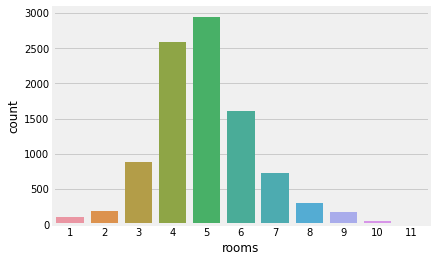

In [94]:
sns.countplot(train['rooms'])

most columns have 2 unique values

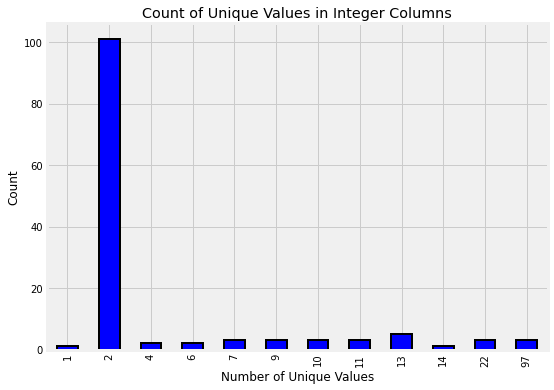

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

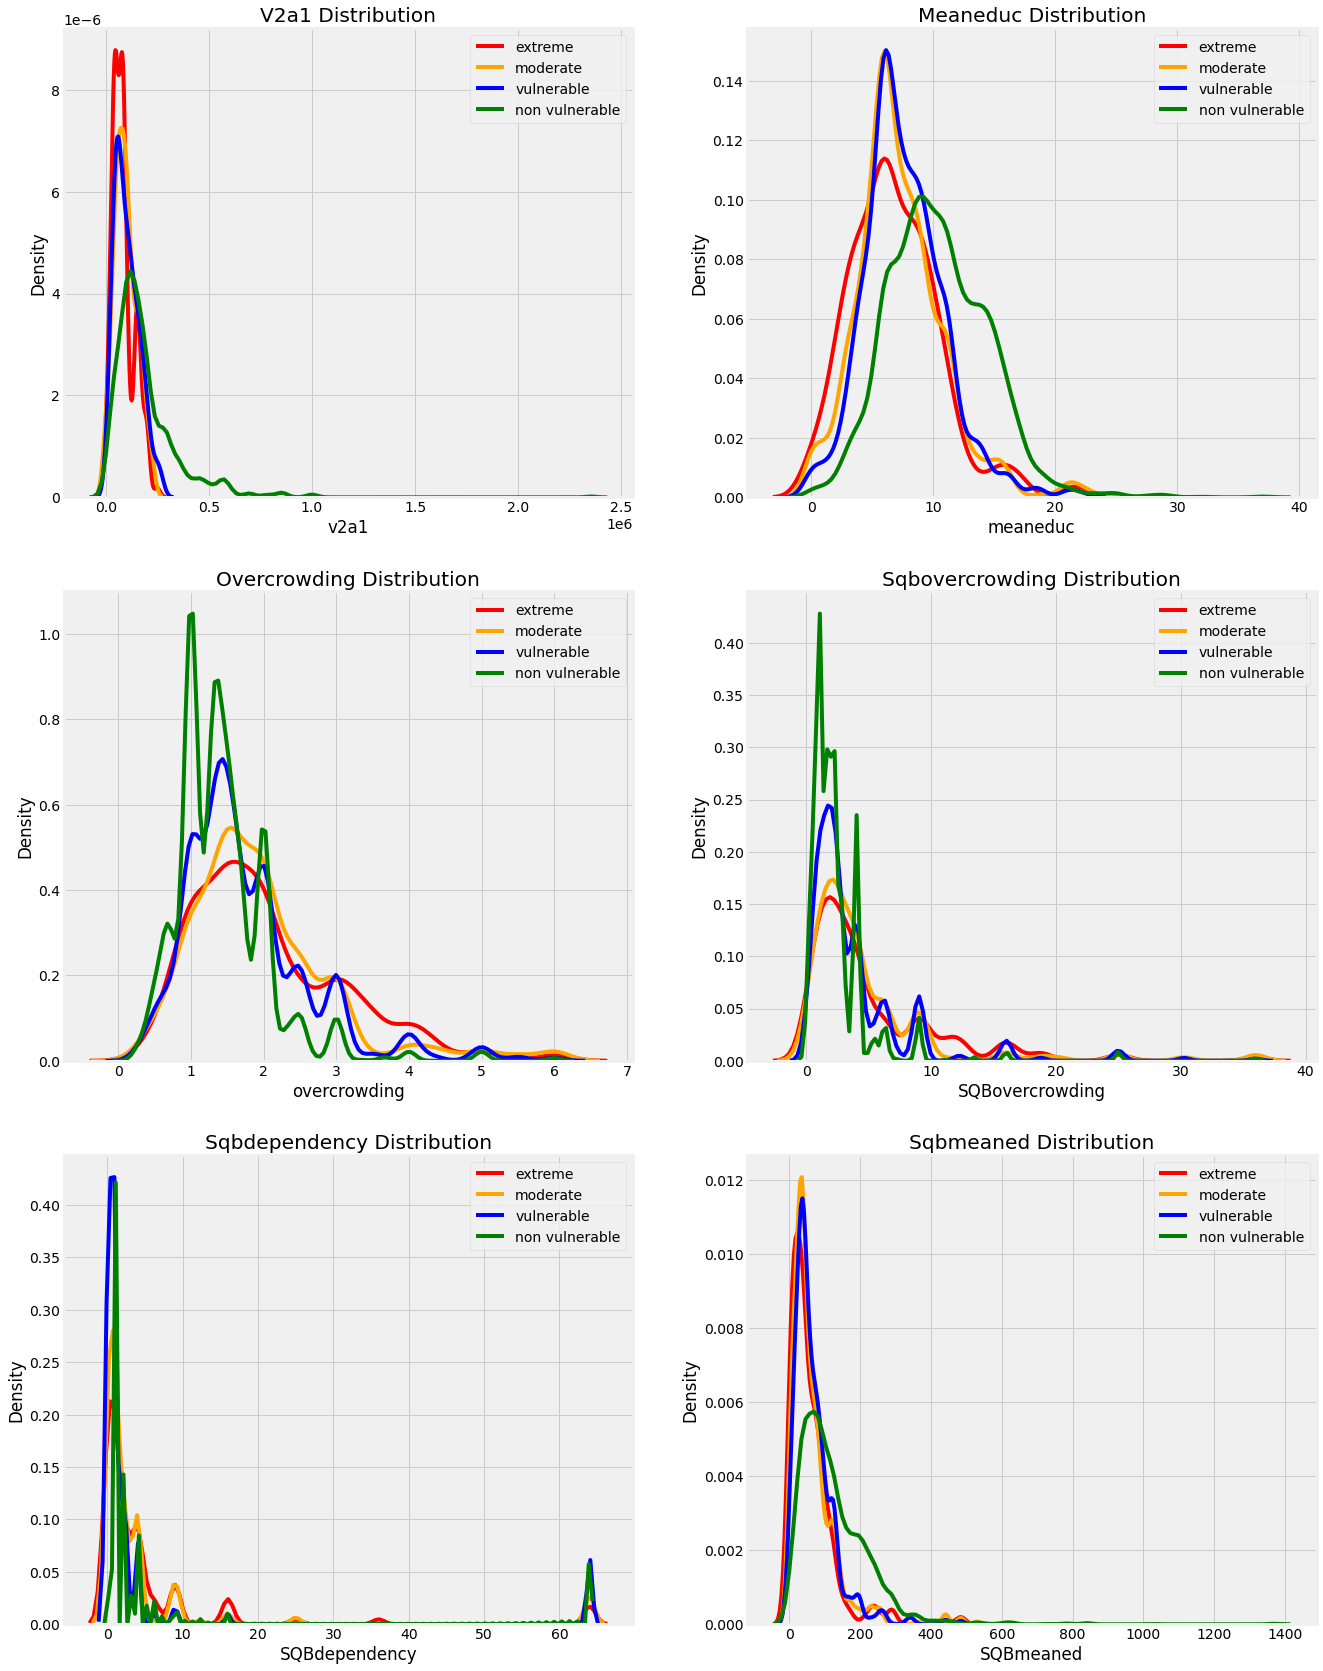

In [96]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [97]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


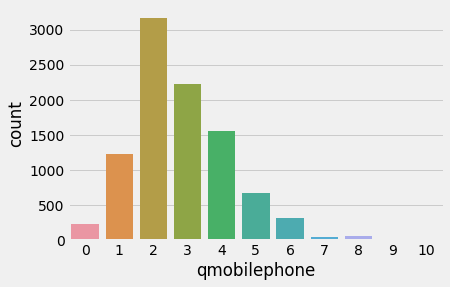

In [98]:
sns.countplot(train['qmobilephone'])

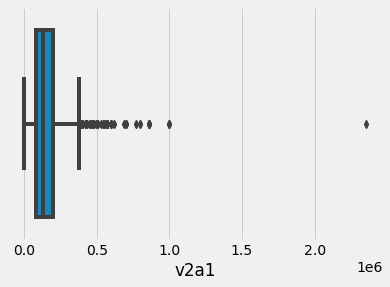

In [99]:
sns.boxplot(train['v2a1'])

In [0]:
train = train.query('v2a1 < 750000')

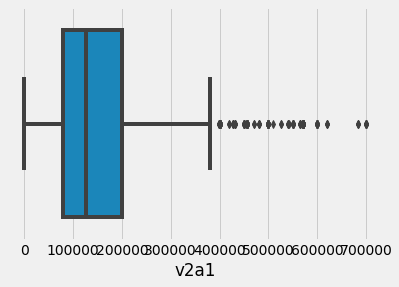

In [101]:
sns.boxplot(train['v2a1'])

In [102]:
train.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          4
agesq              0
Target             0
Length: 141, dtype: int64

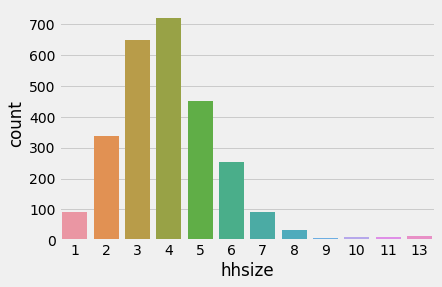

In [103]:


sns.countplot(train['hhsize'])

In [0]:
train.drop(['tamhog','tamviv'],axis=1,inplace=True)
test.drop(['tamhog','tamviv'],axis=1,inplace=True)
train.drop(['meaneduc'],axis=1,inplace=True)
test.drop(['meaneduc'],axis=1,inplace=True)

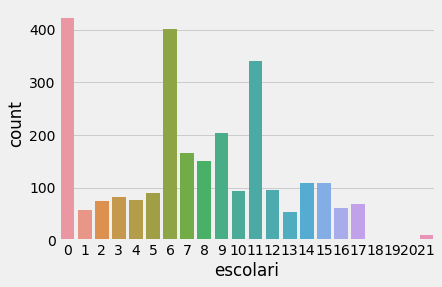

In [105]:
sns.countplot(train['escolari'])

In [0]:
train.drop(['hhsize'],axis=1,inplace=True)
test.drop(['hhsize'],axis=1,inplace=True)

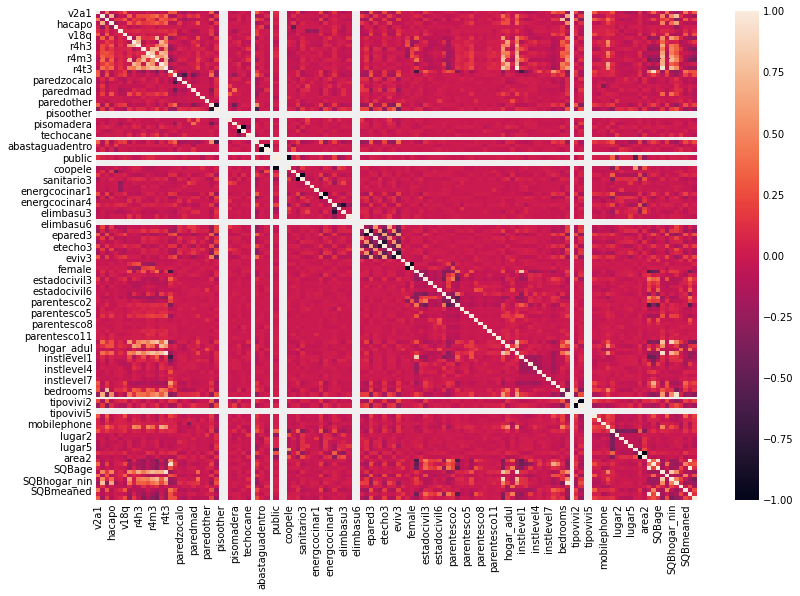

In [107]:
t1=train.head(20)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
cor=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cor)


Squared Variables
First, the easiest step: we'll remove all of the squared variables. Sometimes variables are squared or transformed as part of feature engineering because it can help linear models learn relationships that are non-linear. However, since we will be using more complex models, these squared features are redundant. They are highly correlated with the non-squared version, and hence can actually hurt our model by adding irrelevant information and also slowing down training.

For an example, let's take a look at SQBage vs age.

sns.lmplot('age', 'SQBage', data = data, fit_reg=False);

plt.title('Squared Age versus Age');

In [0]:

train.drop(['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'],axis=1,inplace=True)

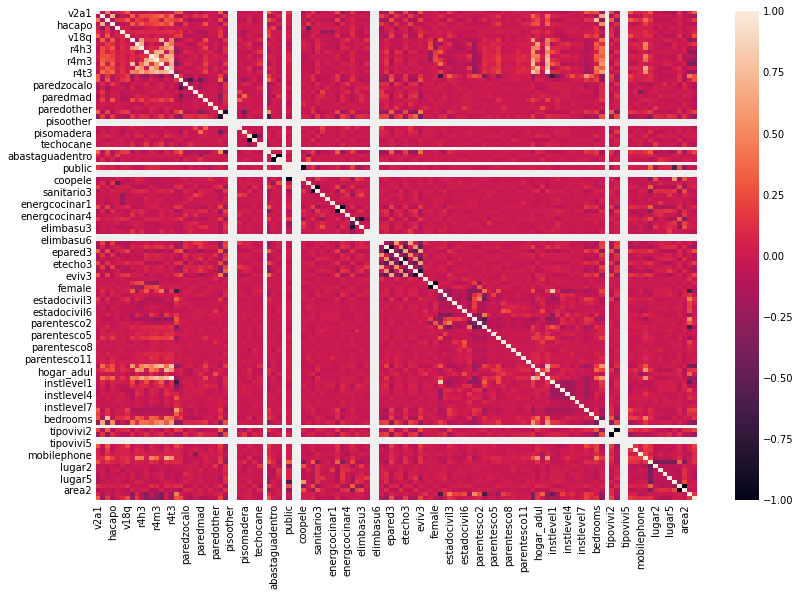

In [109]:
t1=train.head(20)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
cor=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cor)


In [0]:

from fastai.tabular import *

In [111]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,...,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0,1,1,0,0,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,...,0,0,21eb7fcc1,0,1,0,1,no,10,no,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,0,1,1,0,0,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,...,0,0,0e5d7a658,0,1,1,1,8,12,no,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,...,0,0,2b58d945f,2,2,0,4,yes,11,no,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,...,0,0,2b58d945f,2,2,0,4,yes,11,no,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,0,2,2,1,1,2,1,3,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,...,0,0,2b58d945f,2,2,0,4,yes,11,no,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,4


In [0]:
train.drop(['idhogar'],axis=1,inplace=True)
test.drop(['idhogar'],axis=1,inplace=True)
#ids=test['Id']


In [0]:
ids=test['Id']

In [114]:
train.shape

(2670, 127)

In [115]:
test.shape

(23856, 135)

In [0]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

In [0]:
test.drop(['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq'],axis=1,inplace=True)

In [0]:
Y_train=train['Target']

In [0]:
train.drop('Target',axis=1,inplace=True)

In [0]:
test.drop('Id',axis=1,inplace=True)

In [0]:
train.drop('Id',axis=1,inplace=True)

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
df_test_scaled = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)
print (df_train_scaled.shape)
print (df_test_scaled.shape)
df_test_scaled=df_test_scaled.values


(2670, 125)
(23856, 125)


In [0]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(, y, test_size = 0.2, random_state = 0)

In [51]:
#from keras.models import Sequential
#from keras.layers import Dense


Using TensorFlow backend.


In [0]:
#classifier=Sequential()

In [53]:
classifier.add(Dense(output_dim=110,init='uniform',activation='relu',input_dim=125))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=125, units=110, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [54]:
#classifier.add(Dense(output_dim=75,init='uniform',activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=75, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [55]:
#classifier.add(Dense(output_dim=45,init='uniform',activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=45, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [56]:
#classifier.add(Dense(output_dim=10,init='uniform',activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=10, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [57]:
#classifier.add(Dense(output_dim=6,init='uniform',activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [58]:
#classifier.add(Dense(output_dim=1,init='uniform',activation='softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:

#classifier.fit(df_train_scaled,Y_train, batch_size=20,epochs=100)

In [0]:

'''
import matplotlib.pyplot as plt
import sys,os
import numpy as np
from sklearn import datasets, preprocessing, metrics
from sklearn.decomposition import PCA
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import ModelCheckpoint
from sklearn.pipeline import Pipeline
from keras.callbacks import EarlyStopping 
from keras.layers.advanced_activations import PReLU
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD,Adam,Adamax,Nadam,Adadelta
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
#from keras.regularizers import l1l2
from sklearn.preprocessing import LabelEncoder
'''

In [0]:
'''
model = Sequential()
#Base Model
model.add(Dense(64, input_dim=125, init='uniform', activation='relu'))
model.add(Dropout(0.20))
model.add(BatchNormalization(moving_mean_initializer='zeros',momentum=0.9))
model.add(Dense(32 ,init='uniform', activation='relu'))
model.add(BatchNormalization(moving_mean_initializer='zeros',momentum=0.9))
model.add(Dropout(0.20))
#model.add(Dense(128, init='uniform', activation='relu'))
#model.add(BatchNormalization(moving_mean_initializer='zeros',momentum=0.9))
#model.add(Dropout(0.20))
model.add(Dense(1, init='uniform', activation='softmax'))
adam=Adam(lr=1e-3, decay=1e-6)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='max')
callbacks = [EarlyStopping(monitor='val_loss', patience=3, verbose=0),checkpoint]   
'''

In [0]:
test['v2a1']=test['v2a1'].fillna(test['v2a1'].mean())

In [0]:

#history=model.fit(train,Y_train,batch_size=100, epochs=50,shuffle=True,callbacks=callbacks)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
clf = RandomForestClassifier()
params={'n_estimators': list(range(40,61, 1))}
gs = GridSearchCV(clf, params, cv=5)

In [125]:
gs.fit(df_train_scaled, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [129]:
test.isnull().sum()

v2a1      0
hacdor    0
rooms     0
hacapo    0
v14a      0
         ..
lugar5    0
lugar6    0
area1     0
area2     0
age       0
Length: 125, dtype: int64

In [0]:
preds=gs.predict(df_test_scaled)

In [132]:
preds

array([4, 4, 4, 4, ..., 4, 4, 4, 4])

In [0]:
submit=pd.DataFrame({'Id': ids, 'Target': preds})

In [0]:
submit.to_csv('submit1.csv', index=False)